<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="#E74C3C" size="7" style="font-family:Arial, sans-serif;">
        Kernels, Filters, and Convolution <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        Computer Vision <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        Mahdi Seyfipoor <br>
    </font>
</div>


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="green" size="7" style="font-family:Arial, sans-serif;">
        Section #1<br>
    </font>
</div>


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        1D Convolution
    </font>
</h1>


1D convolution is a powerful technique widely used in machine learning, particularly in the analysis of sequential data like time-series signals, speech, and even stock prices. At its core, 1D convolution works by sliding a filter or kernel over a sequence of data points to detect patterns, extract features, or smooth the data. Unlike 2D convolution, which operates on grids (such as images), 1D convolution works on one-dimensional sequences, making it well-suited for problems where data is ordered in time or space.

<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        How 1D Convolution Works
    </font>
</h2>


The basic idea of 1D convolution involves applying a kernel to a sequence of values. The kernel slides over the input sequence, performing element-wise multiplications followed by a sum. This produces a new sequence that highlights certain features based on the kernel used. For example, in time-series analysis, different kernels can detect trends, seasonal patterns, or sharp changes in the data.


The result of 1D convolution is a feature map, which is another sequence that represents important aspects of the input sequence. Depending on the choice of kernel, stride (the step size at which the kernel moves), and padding (how edges of the sequence are handled), 1D convolution can either downsample or retain the size of the original sequence.

There are various approaches to implementing 1D convolution, each with its own trade-offs in terms of computational efficiency and feature extraction. These approaches can be adapted to suit specific tasks and data characteristics.


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Applications of 1D Convolution
    </font>
</h2>


1D convolution is applied in a variety of fields, making it a versatile tool in machine learning:
 
* <strong>Stock Price Prediction:</strong> 1D convolution is used to analyze historical price data and detect patterns such as upward or downward trends. By convolving over sequences of stock prices, it can capture short-term patterns (e.g., daily fluctuations) or long-term trends (e.g., month-to-month performance). Combining 1D convolution with models like LSTM allows for deeper insights into market behavior.

* <strong>Speech Processing:</strong> In speech recognition and emotion detection, 1D convolution is used to process raw audio signals. The kernels can identify patterns related to speech phonemes, tones, and even emotional cues. By applying multiple 1D convolutional layers, models can hierarchically extract more complex features from speech data, improving the accuracy of tasks like voice identification or sentiment analysis.

* <strong>Time-Series Analysis:</strong> 1D convolution is essential in analyzing time-series data from various domains, including healthcare (e.g., analyzing heart rate variability), industrial monitoring (e.g., detecting anomalies in sensor data), and environmental science (e.g., analyzing weather patterns). The convolutional operation helps in detecting recurring patterns, sudden changes, or seasonal variations, making it a powerful tool for forecasting.

* <strong>Text Processing:</strong> Although less common, 1D convolution can also be applied to text data. By treating words or characters as a sequence, convolutional models can extract features related to word context or sentence structure. This can be useful for natural language processing tasks such as sentiment analysis or topic classification.



For understanding the mathematics behind 1D convolution, We recommend watching this <a href="https://www.youtube.com/watch?v=KuXjwB4LzSA&t=443s" target="_blank" style="color:#007acc;">YouTube video</a>.


In [2]:
import math
import numpy as np

def pad_me(signal, kernel):
    pad_len = math.floor((len(kernel) - 1) / 2)
    padded_signal = []

    for k in range (0, pad_len):
        padded_signal.append(0)

    for l in range(0, len(signal)):
        padded_signal.append(signal[l])
    
    for k in range (0, pad_len):
        padded_signal.append(0)

    padded_signal = np.array(padded_signal)
    return padded_signal

In [3]:
import numpy as np

def convolve_1d_two_loops(input_signal, kernel):
    signal = pad_me(input_signal, kernel)
    signal_length = len(signal)
    kernel_length = len(kernel)
    output = [0] * signal_length

    for i in range(signal_length):
        for j in range(kernel_length):
            # if 0 <= i - j < signal_length:
                output[i] += signal[i - j] * kernel[j]

    offset = len(signal) - len(input_signal)
    return output[offset:]

signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])
print(convolve_1d_two_loops(signal, kernel))

[2, 2, 2, 2, -4]


In [4]:
import numpy as np

def convolve_1d_one_loops(signal, kernel):
    kernel_array = np.array(kernel)
    kernel_array = kernel_array[::-1]
    padded_signal = pad_me(signal, kernel)
    output = []
    for i in range(0, int((len(padded_signal) - len(kernel_array))) + 1 , 1):
        output.append(np.sum(padded_signal[i:i + kernel_array.shape[0]] * kernel_array))

    return output

signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])
print(convolve_1d_one_loops(signal, kernel))

[2, 2, 2, 2, -4]


In [5]:
import numpy as np

def convolve_1d_dot(signal, input_kernel):
    kernel_array = np.array(kernel)
    kernel_array = kernel_array[::-1]
    padded_signal = pad_me(signal, kernel)
    output = []
    for i in range(0, int((len(padded_signal) - len(kernel_array))) + 1 , 1):
        output.append(np.dot(padded_signal[i:i + kernel_array.shape[0]], kernel_array))
    return output

#rose's test case
input_signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])
print(convolve_1d_dot(input_signal, kernel))

[2, 2, 2, 2, -4]


In [6]:
import numpy as np
from scipy import signal as scisig

def fft_convolve_vectorized(input_signal, kernel):
    output = scisig.fftconvolve(input_signal, kernel, mode='same')
    return output

input_signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])
print(fft_convolve_vectorized(input_signal, kernel))

[ 2.  2.  2.  2. -4.]


In [7]:
# Sanity check to verify that the functions return similar results
input_signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])

signal_len = len(input_signal)
kernel_len = len(kernel)

print("Sanity Check: Comparing Results")
print("Two loops:", convolve_1d_two_loops(signal, kernel))
print("One loop:", convolve_1d_one_loops(input_signal, kernel))
input_signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])
print("Dot product:", convolve_1d_dot(input_signal, kernel))
print("FFT vectorized:", fft_convolve_vectorized(input_signal, kernel))
print("numpy function:", np.convolve(input_signal, kernel)[int(np.ceil(kernel_len / 2)) - 1: int(np.ceil(kernel_len / 2)) + signal_len - 1])

Sanity Check: Comparing Results
Two loops: [2, 2, 2, 2, -4]
One loop: [2, 2, 2, 2, -4]
Dot product: [2, 2, 2, 2, -4]
FFT vectorized: [ 2.  2.  2.  2. -4.]
numpy function: [ 2  2  2  2 -4]


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>


In this section, we will explore the features that different kernels are designed to extract. For each kernel provided, identify what type of feature or pattern the kernel is trying to detect in a sequence.
#### **1. Kernel: `[1, -1]`**

**Answer:**
the 1 is checking the intensity of the current pixel and the -1 subtracts the next one's from the current one's. It means that if the 2 pixels are not parts of the same object, the result of the subtraction will stand out. For example in Object detection or edge detection, this kernel can be quite helpful.

---

#### **2. Kernel: `[1, 1, 1]`**

**Answer:** This one actually calculates the average of 3 horizontally adjacent pixels. The outcome is that the sharpness or noise in one of the pixels is distributed among all 3 pixels, therefore the kernel [1,1,1] is a sort of smoothing filter.


---

#### **3. Kernel: `[0.25, 0.25, 0.25, 0.25]`**

**Answer:** This one is a normalization filter as it gets the average of 4 horizontally adjacent pixels and sums them up, it will smoothes sharpness of the umage and makes the transitions quite smoother.


---

#### **4. Kernel: `[-1, 2, -1]`**

**Answer:** This one is trying to keep the middle pixel in 3 concecutive pixels and puts an emphasis on that pixel and is detecting sharp intensity changes of the image. This filter can be ued to detect edges (in where the sharp transistions are intense).


---

#### **5. Kernel: `[1, 0, -1]`**

**Answer:** This one is used in edge detection as it is a higher-pass filter and highlights the parts of the image in where the pixels transtions are quite sharp.




In [8]:
import numpy as np
import timeit

def numpy_convolve(input_signal, kernel):
    kernel_len = len(kernel)
    signal_len = len(input_signal)
    np.convolve(input_signal, kernel)[int(np.ceil(kernel_len / 2)) - 1: int(np.ceil(kernel_len / 2)) + signal_len - 1]

def benchmark_convolution(signal_len, kernel_len, iterations):
    np.random.seed(42)  # For reproducibility 
    random_signal = np.random.rand(signal_len)
    random_kernel = np.random.rand(kernel_len)

    time_two_loops = timeit.timeit(lambda: convolve_1d_two_loops(random_signal, random_kernel), number=iterations)
    time_one_loop = timeit.timeit(lambda: convolve_1d_one_loops(random_signal, random_kernel), number=iterations)
    time_fft = timeit.timeit(lambda: fft_convolve_vectorized(random_signal, random_kernel), number=iterations)
    time_dot = timeit.timeit(lambda: convolve_1d_dot(random_signal, random_kernel), number=iterations)
    np_time = timeit.timeit(lambda: numpy_convolve(random_signal, random_kernel), number=iterations)

    output = []
    output.append(time_two_loops/iterations)
    output.append(time_one_loop/iterations)
    output.append(time_dot/iterations)
    output.append(time_fft/iterations)
    output.append(np_time/iterations)
    return output

num_iterations = 1000
signal_len = 500
kernel_len = 20
avg_times = benchmark_convolution(signal_len, kernel_len, num_iterations)

print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Two loops: {avg_times[0]}")
print(f"One loop: {avg_times[1]}")
print(f"Dot product: {avg_times[2]}")
print(f"FFT vectorized: {avg_times[3]}")
print(f"NumPy convolve: {avg_times[4]}")


Average times over 1000 iterations (in seconds):
Two loops: 0.0031169096999801695
One loop: 0.001764002799987793
Dot product: 0.0007963117000181227
FFT vectorized: 7.127509999554605e-05
NumPy convolve: 1.2174999981652946e-05


In [13]:
import numpy as np
import timeit

def numpy_convolve(input_signal, kernel):
    kernel_len = len(kernel)
    signal_len = len(input_signal)
    np.convolve(input_signal, kernel)[int(np.ceil(kernel_len / 2)) - 1: int(np.ceil(kernel_len / 2)) + signal_len - 1]

def benchmark_convolution(signal_len, kernel_len, iterations):
    np.random.seed(42)  # For reproducibility 
    random_signal = np.random.rand(signal_len)
    random_kernel = np.random.rand(kernel_len)

    time_two_loops = timeit.timeit(lambda: convolve_1d_two_loops(random_signal, random_kernel), number=iterations)
    time_one_loop = timeit.timeit(lambda: convolve_1d_one_loops(random_signal, random_kernel), number=iterations)
    time_fft = timeit.timeit(lambda: fft_convolve_vectorized(random_signal, random_kernel), number=iterations)
    time_dot = timeit.timeit(lambda: convolve_1d_dot(random_signal, random_kernel), number=iterations)
    np_time = timeit.timeit(lambda: numpy_convolve(random_signal, random_kernel), number=iterations)

    output = []
    output.append(time_two_loops/iterations)
    output.append(time_one_loop/iterations)
    output.append(time_dot/iterations)
    output.append(time_fft/iterations)
    output.append(np_time/iterations)
    return output

num_iterations = 1000
signal_len = 15
kernel_len = 1
avg_times = benchmark_convolution(signal_len, kernel_len, num_iterations)

print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Two loops: {avg_times[0]}")
print(f"One loop: {avg_times[1]}")
print(f"Dot product: {avg_times[2]}")
print(f"FFT vectorized: {avg_times[3]}")
print(f"NumPy convolve: {avg_times[4]}")


Average times over 1000 iterations (in seconds):
Two loops: 1.5604000014718622e-05
One loop: 9.534810000332072e-05
Dot product: 3.1245599966496226e-05
FFT vectorized: 2.1273399994242936e-05
NumPy convolve: 3.6900000413879753e-06


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>

#### **1. Performance Comparison of Convolution Methods**

After running the convolution methods, compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm used by each method.

**Answer:** The fastest was np.Convolve and the slowest was the one with 2 for lopps. This difference is definitely dependent on the algorithms applied in each one. For exampl in the 2-loop case, the algorithm's time complexity is of n^2 which is quite high. However in built-in methods such as numpy.onvolve and FFT, some optimizations have been applied to speed up the process.


---

#### **2. FFT Convolution Time Complexity**

You may have noticed that the FFT-based convolution is much faster than the others for longer signals. Can you describe the time complexity of the FFT convolution? Why is this method more efficient for larger input sizes?

**Answer:** Time complexity of the FFT algorithm is :nlog(n). The hand-written algorithms apply a spatial approach to calculate the convolution, however, the FFT makes use of Frequency approach and for larger kernels and images, the frequency approach is highly more efficient than the that of spatial approach.


---

#### **3. Scaling with Signal Length and Kernel Length**

Try changing the values of `signal_len` and `kernel_len` (e.g., doubling both lengths). Is the relative performance of the methods (speed comparison) the same as before? Which methods are most affected by changes in the size of the signal or kernel?

**Answer:** I change the signal length and kernel lenght to 15 and 1 respectively. As can be seen, eventhough the reduction ratio is almost 1 / 30, the FFT method's speed got one seventh and is not the fastest one anymore. In this case, np.Convolve and 2-loop approaches did best.


---

#### **4. Optimal Use Case for FFT Convolution**

Based on the results of your experiments, when would it be best to use the FFT-based convolution versus one of the other methods? Consider factors like signal length, kernel length, and computational resources.

**Answer:** in case the kernel length and the signal length are larger than about 50, FFT is preferred among other methods due to its efficiency. Regarding the computational resources, since the FFT algorithm needs to decompoe the signal into frequencies and transform it into Fourier space, it requires more memory and computational power that should be taken into consideration while being chosen.


---

#### **5. NumPy Convolve vs Custom Implementations**

Compare the performance of the built-in `np.convolve` with your custom implementations (like the dot-product or one-loop versions). Why do you think the `np.convolve` function performs as it does? Could it be internally optimized, and if so, how? 

**Answer:** I took a look at the source code of np.Convolve and saw that for small arrays it applies np.Correlate which is the normal way of calculating the correlation of 2 arrays, however, for larger signals, it applies scipy.signal.correlate to guarantee a high effeciency in performance as the scipy correlation applied FFT approach for calculating the correlations.


---

#### **6. Interpretation of Results for Small Signal and Kernel Sizes**

For smaller values of `signal_len` and `kernel_len`, you might see different performance trends. Can you explain why the FFT method might not always be the best choice when working with smaller inputs?

**Answer:** Consider the plots of n^2 and nlog(n). For values less than 1, n^2 is less than the oter one. However, the growth rate of the n^2 is way larger and the larger the input values become, the more gap will be between the 2. The same thing works for the case of FFT comparison with the rest of methods.
---


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        2D Convolution
    </font>
</h1>

2D convolution is a critical technique in image processing and other tasks where data is represented in two dimensions, such as images. In 2D convolution, a kernel (or filter) slides over a 2D input matrix to produce a feature map. This technique is used for tasks like edge detection, blurring, and pattern recognition in images.

<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        How 2D Convolution Works
    </font>
</h1>

The process of 2D convolution involves applying a kernel to an input matrix by sliding the kernel over the matrix and performing element-wise multiplication followed by a sum. This operation results in a new matrix that highlights features based on the kernel used.


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Applications of 2D Convolution
    </font>
</h1>

- **Image Processing**: 2D convolution is fundamental for operations like edge detection, sharpening, and smoothing in image processing. By applying different kernels, various features in the image can be emphasized or suppressed.
- **Feature Extraction in CNNs**: In Convolutional Neural Networks (CNNs), 2D convolution layers are used to extract features from images, which are then used for tasks like image classification, object detection, and segmentation.
- **Medical Imaging**: 2D convolution is used in medical imaging to enhance features or detect abnormalities in images such as MRI scans and X-rays.


For understanding the mathematics behind 2D convolution, We recommend watching [YouTube video](https://www.youtube.com/watch?v=O2CBKXr_Tuc).

In [14]:
import numpy as np

def convolve_2d_four_loops(image, kernel, stride=1, pad=0):
    if pad > 0:
        image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)

    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1

    output = np.zeros((output_height, output_width))

    for i in range(output_height): 
        for j in range(output_width):
            value = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    image_row = i * stride + m
                    image_col = j * stride + n
                    value += image[image_row, image_col] * kernel[m, n]
            output[i, j] = value

    return output

In [15]:
import numpy as np

def convolve_2d_two_loops(image, kernel, stride=1, pad=0):
    if pad > 0:
        image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)

    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1

    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            region = image[
                i * stride:i * stride + kernel_height,
                j * stride:j * stride + kernel_width]

            output[i, j] = np.sum(region * kernel)

    return output

### Convolution Using im2col

The `im2col` method is a powerful technique used to convert convolution operations into matrix multiplications. This technique simplifies and speeds up convolution computations, which are fundamental in many image processing and deep learning tasks.

#### im2col Transformation:
The `im2col` technique involves extracting overlapping patches from the padded image, each corresponding to a position of the kernel. These patches are then flattened into column vectors.

### Multiplication
Once the image patches are transformed into the im2col matrix, convolution can be performed using matrix multiplication. Flatten the kernel matrix into a vector `k_vec`. The convolution result can then be obtained by multiplying the im2col matrix by `k_vec`.

<img src="https://www.researchgate.net/publication/364684841/figure/fig7/AS:11431281091934216@1666661734455/An-example-of-the-Im2col-convolution-optimization-algorithm-In-terms-of-FPGA-based.png" alt="Steve Jobs" style="width: 750px; height: auto;">


For an image matrix of size `H x W` and a kernel of size `kH x kW` with stride `S`, we can ask:

- **Question 1:**
  What will be the number of columns in the output matrix from the im2col transformation?

  **Answer:**



- **Question 2:**
What will be the number of rows in the im2col matrix?

  **Answer:**



In [ ]:
import numpy as np

def convolve_2d_im2col(image, kernel, stride=1, pad=0):

    # Obtain the dimensions of the image and kernel 
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the dimensions of the output matrix
    out_height = (image_height + 2 * pad - kernel_height) // stride + 1
    out_width = (image_width + 2 * pad - kernel_width) // stride + 1

    # Pad the image
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)

    # Create the im2col matrix
    image_cols = np.zeros((kernel_height * kernel_width, out_height * out_width))
    
    for y in range(out_height):
        for x in range(out_width):
            patch = padded_image[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width]
            image_cols[:, y*out_width + x] = patch.flatten()
    
    # Flatten the kernel
    kernel_flat = kernel.flatten()
    
    # Perform the convolution using matrix multiplication
    output_flat = kernel_flat @ image_cols
    
    # Reshape the output to the correct dimensions
    output = output_flat.reshape(out_height, out_width)
    
    return output

In [17]:
# Define a small image and kernel for testing
image = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

kernel = np.array([
    [1, 0],
    [0, -1]
])

stride = 1
pad = 1
print("Sanity Check: Comparing Results for 2D Convolution")

result_four_loops = convolve_2d_four_loops(image, kernel, stride=stride, pad=pad)
print("Four loops:\n", result_four_loops)

result_two_loops = convolve_2d_two_loops(image, kernel, stride=stride, pad=pad)
print("Two loops:\n", result_two_loops)

result_im2col = convolve_2d_im2col(image, kernel, stride=stride, pad=pad)
print("im2col method:\n", result_im2col)

if (np.allclose(result_four_loops, result_two_loops) and
    np.allclose(result_two_loops, result_im2col)):
    print("Sanity Check Passed: All methods produce similar results.")
else:
    print("Sanity Check Failed: The methods produce different results.")


Sanity Check: Comparing Results for 2D Convolution
Four loops:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
Two loops:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
im2col method:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
Sanity Check Passed: All methods produce similar results.


In [18]:
import numpy as np
import timeit

def benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, iterations):
    np.random.seed(42)
    random_image = np.random.rand(image_height, image_width)
    random_kernel = np.random.rand(kernel_height, kernel_width)

    # Measure the execution time for each method
    time_four_loops = timeit.timeit(
        lambda: convolve_2d_four_loops(random_image, random_kernel, stride, pad), 
        number=iterations
    ) / iterations
    time_two_loops = timeit.timeit(
        lambda: convolve_2d_two_loops(random_image, random_kernel, stride, pad), 
        number=iterations
    ) / iterations
    time_im2col = timeit.timeit(
        lambda: convolve_2d_im2col(random_image, random_kernel, stride, pad), 
        number=iterations
    ) / iterations

    return (time_four_loops, time_two_loops, time_im2col)

num_iterations = 100

image_height = 50
image_width = 50
kernel_height = 4
kernel_width = 4
stride = 1
pad = 2
avg_times = benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Four loops: {avg_times[0]}")
print(f"Two loops: {avg_times[1]}")
print(f"im2col: {avg_times[2]}")



Average times over 100 iterations (in seconds):
Four loops: 0.020956308000022544
Two loops: 0.014711422999971547
im2col: 0.0061972890002653


In [32]:
import numpy as np

num_iterations = 100
image_height = 50
image_width = 50
kernel_height = 4
kernel_width = 4
stride = 100
pad = 1

avg_times = benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, num_iterations)

print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Four loops: {avg_times[0]}")  
print(f"Two loops: {avg_times[1]}")
print(f"im2col: {avg_times[2]}")



Average times over 100 iterations (in seconds):
Four loops: 0.00012205699982587248
Two loops: 8.211600012145936e-05
im2col: 5.647299985866994e-05


In [ ]:
#increase image size
num_iterations = 100

image_height = 100
image_width = 100
kernel_height = 4
kernel_width = 4
stride = 1
pad = 2

avg_times = benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Four loops: {avg_times[0]}")
print(f"Two loops: {avg_times[1]}")
print(f"im2col: {avg_times[2]}")


Average times over 100 iterations (in seconds):
Four loops: 0.06562946400023066
Two loops: 0.05839927199995145
im2col: 0.02138685300014913


In [ ]:
#increase kernel size
num_iterations = 100

image_height = 50
image_width = 50
kernel_height = 40
kernel_width = 40
stride = 1
pad = 2

avg_times = benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Four loops: {avg_times[0]}")
print(f"Two loops: {avg_times[1]}")
print(f"im2col: {avg_times[2]}")


Average times over 100 iterations (in seconds):
Four loops: 0.14134697300032711
Two loops: 0.00166500499995891
im2col: 0.0024581560003571214


### **Assignment Questions for 2D Convolution**

#### **1. Performance Comparison of 2D Convolution Methods**

After running the 2D convolution methods (four loops, two loops, and `im2col`), compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm and memory usage of each method.

**Answer:** im2col performed fastes and the 4-loop approach performed slowest as expected. The main reason for im2col being fastest is that the input and kernels can be represented as two big matrices and the convolution can be done in a single matrix multiplication. This speeds up the process because a matrix multiplication can be parallelized very well.


---

#### **2. Effect of Stride and Padding on Performance**

Try changing the values of `stride` and `pad`. How do these changes affect the performance of the different convolution methods? Which method shows the most significant performance change with varying stride and padding?

**Answer:** After I set stride 100 (which means only 1 round of convolution will be applied), the two-loop method's spped increased by 1000 times and its rise was most among all. As apposed to that increase, im2col rose about 100 times.


---

#### **3. Scaling with Image and Kernel Size**

Change the `image_height`, `image_width`, `kernel_height`, and `kernel_width` values (e.g., double both). How does the performance scale with the size of the image and kernel? Which method is most affected by these changes?

**Answer:** Increasing the image size affected all methods and all of them performed at the order of 10^-1 and the 2nd and third methods got affected most. However, increading the kernel size had a slighter impact compared to increasing the image size. After enlarging the kernel matrix, the 4-loop method's performance drop most significantly.


---

#### **4. When to Use `im2col` Method**

Based on your experiments, when would you prefer to use the `im2col` method over the other methods? Consider factors like image size, kernel size, stride, padding, and computational efficiency.

**Answer:** In case the stride is small, kernel and image are large and therefore too many matrix multiplications will be needed and there is GPU availble to parallelize the calculations. This scenario is an ideal case for im2col to be applied.


---

#### **5. Interpretation of Results for Small Image and Kernel Sizes**

For smaller image and kernel sizes, performance differences may be less noticeable. Can you explain why some methods, such as `im2col`, might not always be the best choice when working with small inputs?

**Answer:** The overhead of parallelism and after that, aggregating the results cannot be neglected especially for small input values, the other approaches can be way more straight forward, fast, and efficient.


---


In [23]:
from skimage import io, color
from skimage.transform import resize
import matplotlib.pyplot as plt

# Load and preprocess image
def load_and_preprocess_image(image_path, new_size=(325, 500)):
    image = io.imread(image_path, as_gray=True)
    if len(image.shape) == 3:  # Check if the image is in color
        image = color.rgb2gray(image)
    image = resize(image, new_size, mode='reflect')
    return image

# Display images
def display_images(original, convolved_images, titles):
    num_convolutions = len(convolved_images)
    num_rows = (num_convolutions + 1) // 2  # Calculate number of rows needed for the grid
    fig_width = 12
    fig_height = 6 + 3 * num_rows  # Adjust height dynamically based on the number of rows

    fig, axes = plt.subplots(num_rows + 1, 2, figsize=(fig_width, fig_height))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Display original image
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Original Image", fontsize=14)
    axes[0].axis('off')

    # Display convolved images
    for i, (img, title) in enumerate(zip(convolved_images, titles), start=1):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title, fontsize=12)
        axes[i].axis('off')
        # Adding border to highlight the images
        axes[i].spines['top'].set_color('blue')
        axes[i].spines['top'].set_linewidth(2)
        axes[i].spines['right'].set_color('blue')
        axes[i].spines['right'].set_linewidth(2)
        axes[i].spines['bottom'].set_color('blue')
        axes[i].spines['bottom'].set_linewidth(2)
        axes[i].spines['left'].set_color('blue')
        axes[i].spines['left'].set_linewidth(2)

    # Hide any unused axes
    for ax in axes[len(convolved_images) + 1:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

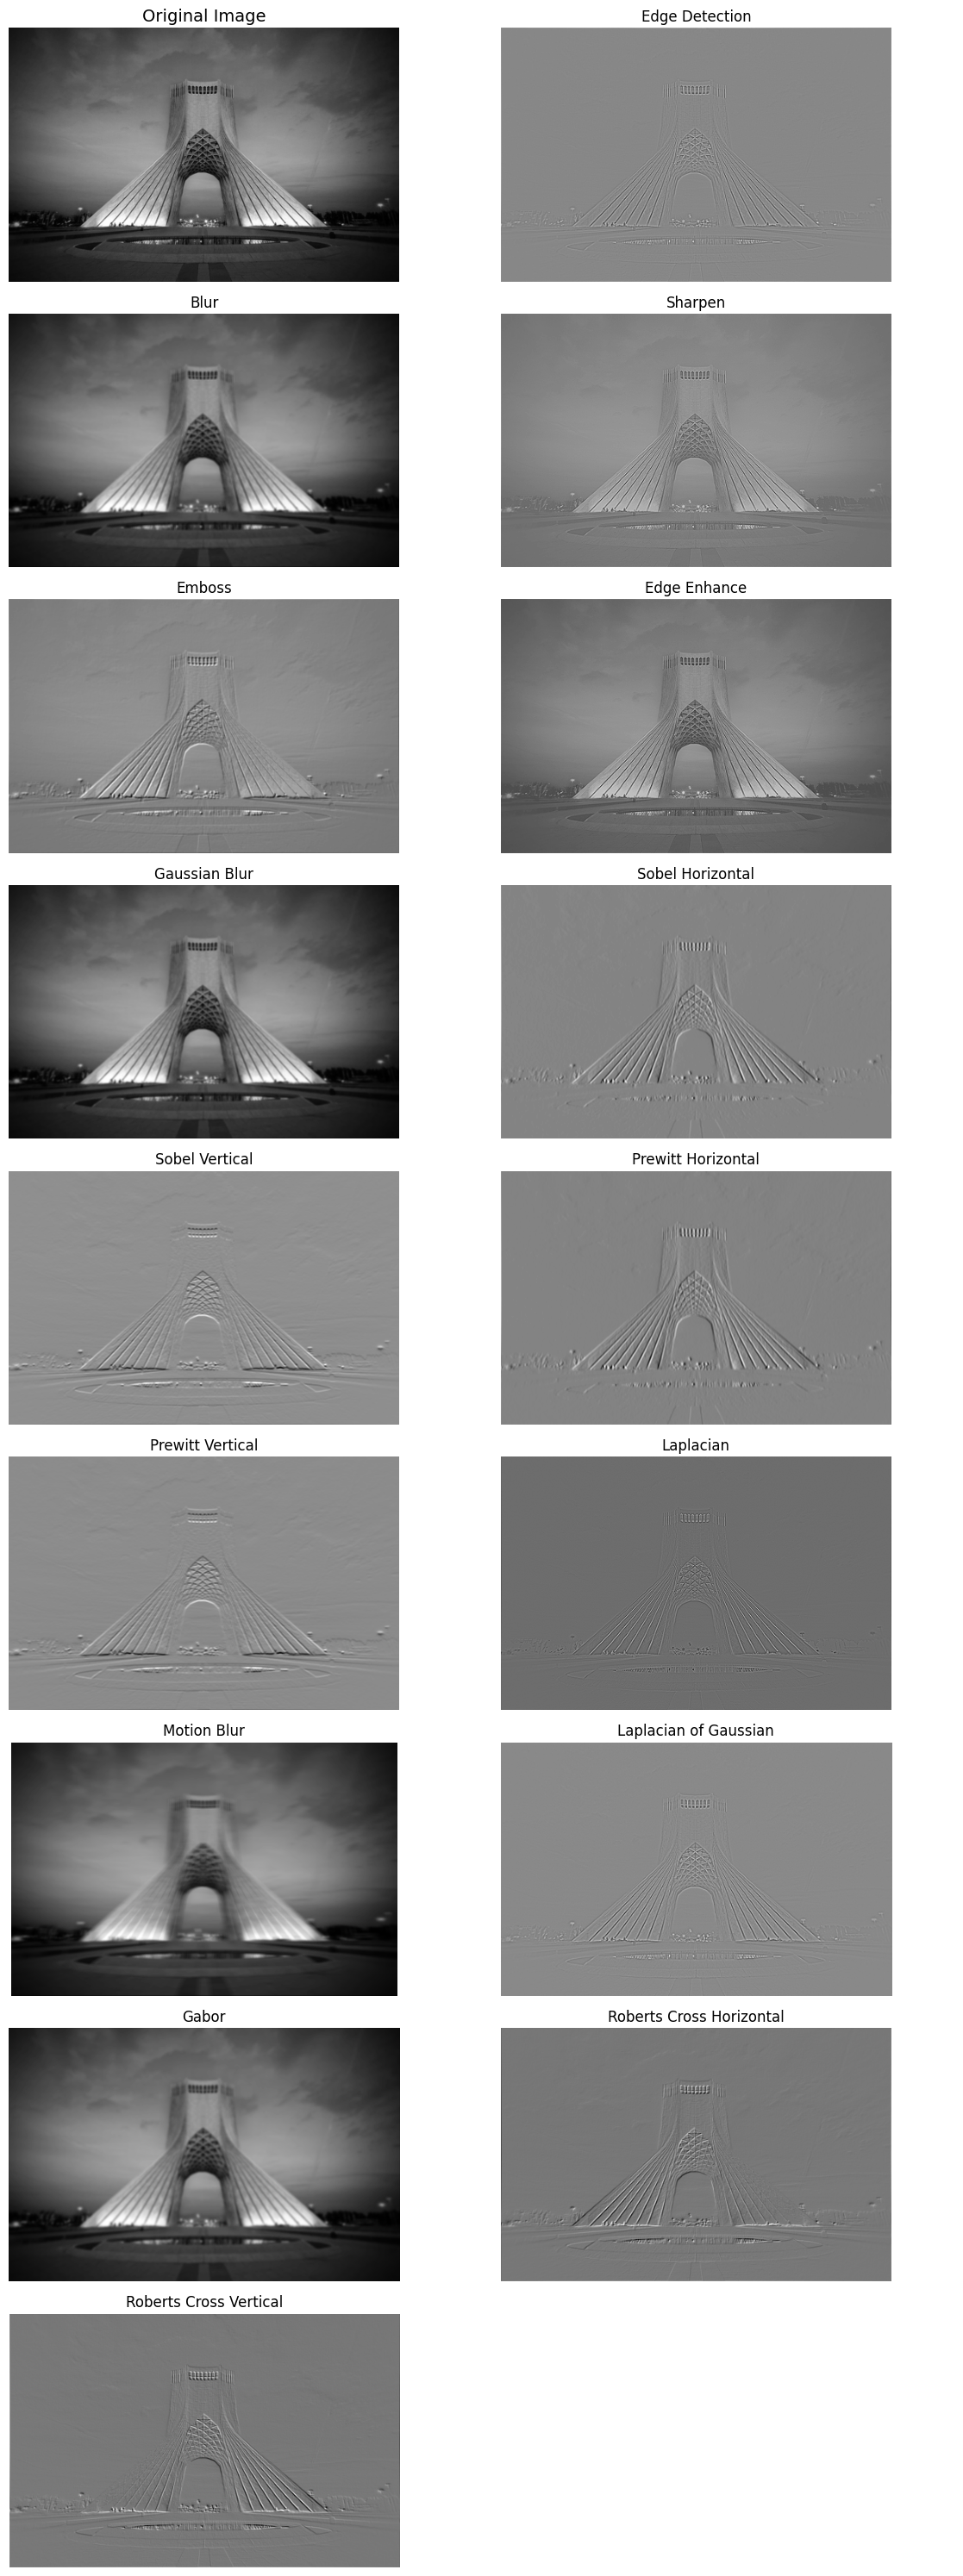

In [38]:
import matplotlib.pyplot as plt
image_path = 'Azadi.jpg'  #This is The path to your image you can Replace with your image
# image_path = 'troy1.png'
image = load_and_preprocess_image(image_path)

# Define kernels

kernels = {
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Blur": np.ones((3, 3)) / 9,
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Edge Enhance": np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]),
    "Gaussian Blur": np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]]),
    "Sobel Horizontal": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Vertical": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Prewitt Horizontal": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    "Prewitt Vertical": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    "Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    "Motion Blur": np.array([[1/9]*9] * 3),  # 3x3 motion blur
    "Laplacian of Gaussian": np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]]),
    "Gabor": np.array([[1, 4, 6, 4, 1], [4, 11, 16, 11, 4], [6, 16, 25, 16, 6], [4, 11, 16, 11, 4], [1, 4, 6, 4, 1]]),
    "Roberts Cross Horizontal": np.array([[1, 0], [0, -1]]),
    "Roberts Cross Vertical": np.array([[0, 1], [-1, 0]]),
}

convolved_images = []
titles = []

for title, kernel in kernels.items():
    convolved_img = convolve_2d_two_loops(image, kernel, stride=1, pad=1)  # Adjust stride and pad as needed
    convolved_images.append(convolved_img)
    titles.append(title)

display_images(image, convolved_images, titles)

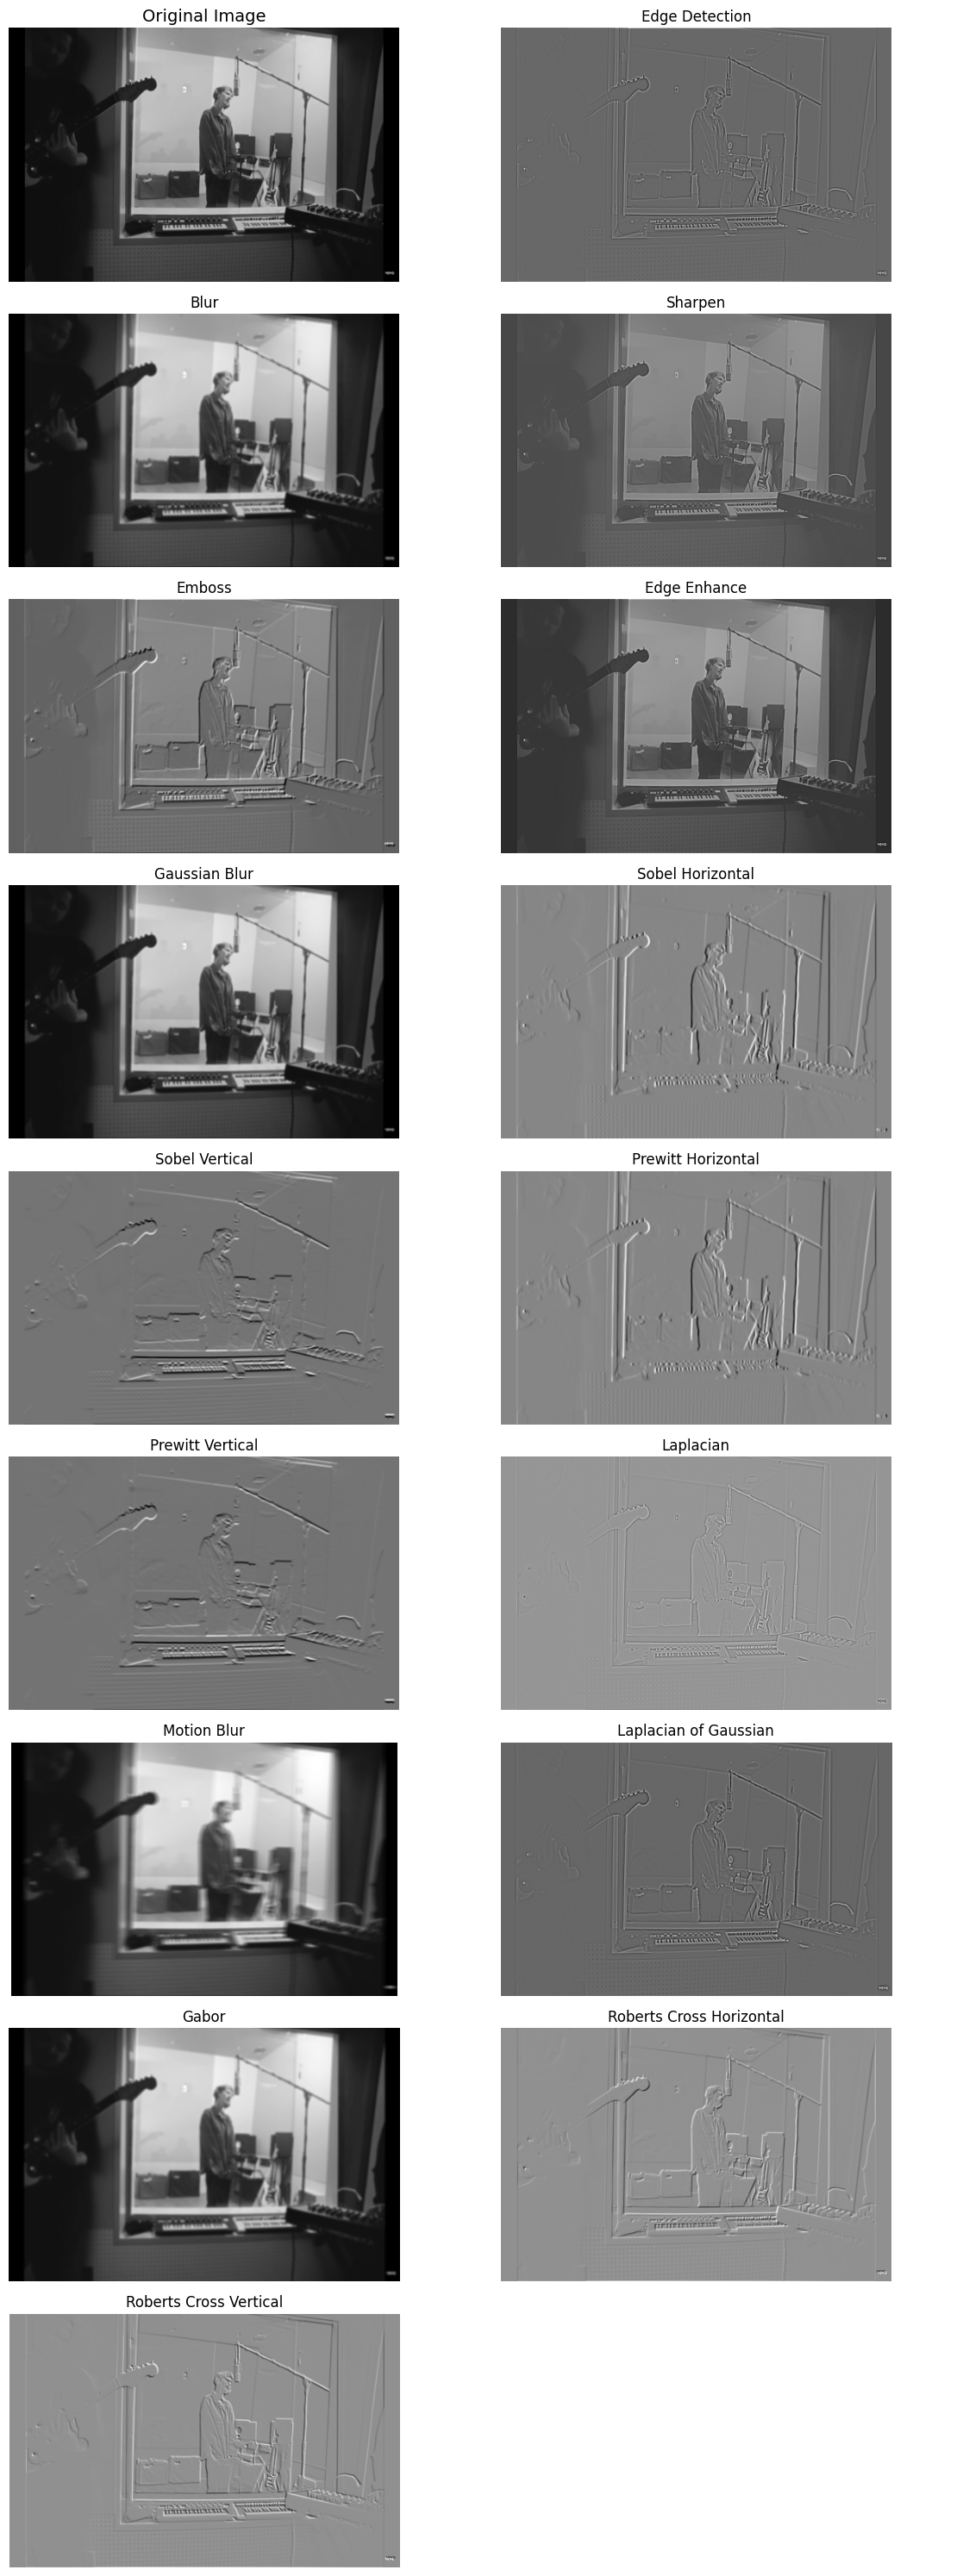

In [ ]:
import matplotlib.pyplot as plt
image_path = 'troy1.png'
image = load_and_preprocess_image(image_path)

# Define kernels

kernels = {
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Blur": np.ones((3, 3)) / 9,
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Edge Enhance": np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]),
    "Gaussian Blur": np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]]),
    "Sobel Horizontal": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Vertical": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Prewitt Horizontal": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    "Prewitt Vertical": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    "Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    "Motion Blur": np.array([[1/9]*9] * 3),  # 3x3 motion blur
    "Laplacian of Gaussian": np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]]),
    "Gabor": np.array([[1, 4, 6, 4, 1], [4, 11, 16, 11, 4], [6, 16, 25, 16, 6], [4, 11, 16, 11, 4], [1, 4, 6, 4, 1]]),
    "Roberts Cross Horizontal": np.array([[1, 0], [0, -1]]),
    "Roberts Cross Vertical": np.array([[0, 1], [-1, 0]]),
}

convolved_images = []
titles = []

for title, kernel in kernels.items():
    convolved_img = convolve_2d_two_loops(image, kernel, stride=1, pad=1)  # Adjust stride and pad as needed
    convolved_images.append(convolved_img)
    titles.append(title)

display_images(image, convolved_images, titles)

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="green" size="7" style="font-family:Arial, sans-serif;">
        Section #2<br>
    </font>
</div>


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection A<br>
    </font>
</div>


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection B<br>
    </font>
</div>


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection C<br>
    </font>
</div>


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection D<br>
    </font>
</div>


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection E<br>
    </font>
</div>
